In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [2]:
file_path = 'connect4_dataset.csv'
dataset = pd.read_csv(file_path)

dataset.head()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.32,0.33,0.34,-1,-1.1,0.35,0.36,1.1,1.2,0.37
0,0,0,0,0,0,0,0,1,0,0,...,1,0,1,1,-1,-1,0,-1,1,0
1,0,0,0,0,0,0,0,0,0,0,...,-1,1,1,1,1,1,1,-1,-1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,-1,-1,-1,1,1,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,1,0,-1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,-1,-1,-1,1,1,-1,-1,-1,1,0


Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.3s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.3s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.3s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.3s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.3s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=5; total time=   0.3s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=5; total time=   0.3s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=5; total time=   0.3s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=5; total time=   0.3s
[CV] END criterion=gini, max

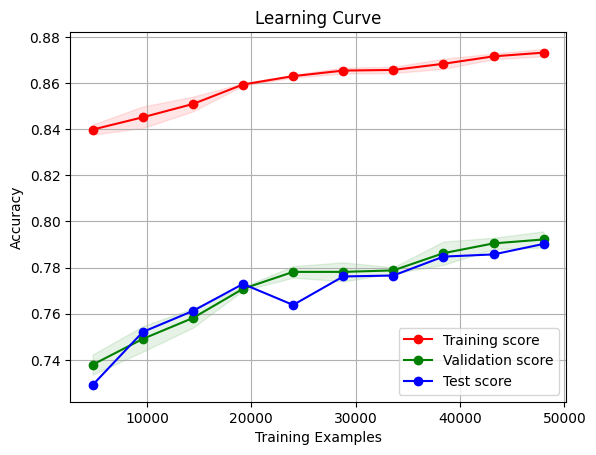

Best Parameters: {'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 10}
Training Accuracy: 87.48%
Validation Accuracy: 79.52%
Test Accuracy: 79.48%


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


file_path = 'connect4_dataset.csv'
dataset = pd.read_csv(file_path)


X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values


valid_indices = (y >= 0) & (y <= 6)
X = X[valid_indices]
y = y[valid_indices]


X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)  # 0.25 * 0.8 = 0.2


param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50], # max depth of the tree
    'min_samples_split': [2, 5, 10], # min number of samples required to split a node
    'min_samples_leaf': [1, 2, 4] # min number of samples required at each leaf node
}


grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, refit=True, verbose=2, cv=5)
grid_search.fit(X_train, y_train)


best_params = grid_search.best_params_
best_model = grid_search.best_estimator_


train_sizes, train_scores, val_scores = learning_curve(best_model, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))


train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)


test_scores = []
for train_size in train_sizes:
    X_train_subset, _, y_train_subset, _ = train_test_split(X_train, y_train, train_size=train_size, random_state=42)
    best_model.fit(X_train_subset, y_train_subset)
    y_test_pred = best_model.predict(X_test)
    test_scores.append(accuracy_score(y_test, y_test_pred))


plt.figure()
plt.title("Learning Curve")
plt.xlabel("Training Examples")
plt.ylabel("Accuracy")
plt.grid()


plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.fill_between(train_sizes, val_scores_mean - val_scores_std, val_scores_mean + val_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, val_scores_mean, 'o-', color="g", label="Validation score")
plt.plot(train_sizes, test_scores, 'o-', color="b", label="Test score")
plt.legend(loc="best")
plt.show()

best_model.fit(X_train, y_train)

y_test_pred = best_model.predict(X_test)

train_accuracy = accuracy_score(y_train, best_model.predict(X_train))
val_accuracy = accuracy_score(y_val, best_model.predict(X_val))
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'Best Parameters: {best_params}')
print(f'Training Accuracy: {train_accuracy * 100:.2f}%')
print(f'Validation Accuracy: {val_accuracy * 100:.2f}%')
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

In [ ]:
import joblib

joblib.dump(best_model, 'decision_tree_model.pkl')

['decision_tree_model.pkl']